In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.linear_model import RidgeCV
import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.preprocessing import LabelBinarizer


DATA ACHIEVE

In [3]:
df = pd.read_excel('result_excl.xlsx')
judge=[None]*len(df)
for i,g in enumerate(df['Average_x']):
    if g <5:
        judge[i] = 'F'
    if g>=5 and g<7:
        judge[i]= 'C'
    if g >=7 and g<8.5:
        judge[i] = 'B'
    if g >= 8.5:
        judge[i] = 'A'
df['Range'] = judge

df

,Unnamed: 0,Student id,s-email,% participate,consistency,c_in_f_half,c_in_s_half,following,immediate_f,review,...,Gender,Matriculation Score,Aspiration,Math Score,Second Score,Third Score,Highschool GPA,Average_y,Submit,Range
0,204,11190958,11190958@st.neu.edu.vn.y2meU,0.142857,0.714286,0.333333,1.0,0.525082,0.250000,0.000000,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,B
1,0,11193747,11193747@st.neu.edu.vn.X0bMT,1.000000,1.000000,1.000000,1.0,0.257812,0.350000,0.108356,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,B
2,1,11193775,11193775@st.neu.edu.vn.X0bMT,0.428571,0.714286,0.333333,1.0,0.196256,0.231293,0.301133,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
3,2,11200006,11200006@st.neu.edu.vn.L71ar,1.000000,1.000000,1.000000,1.0,0.282074,0.209524,0.850032,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,A
4,3,11200012,11200012@st.neu.edu.vn.X0bMT,1.000000,1.000000,1.000000,1.0,0.475391,0.496939,1.549039,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,251,11218494,11218494@st.neu.edu.vn.y2meU,1.000000,1.000000,1.000000,1.0,0.051431,0.052976,0.085158,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,A
249,194,11218495,11218495@st.neu.edu.vn.L71ar,1.000000,1.000000,1.000000,1.0,0.204232,0.365568,1.607492,...,1,27.55,1.0,8.8,8.5,10.0,8.6,NaN,0.200000,A
250,252,11218496,11218496@st.neu.edu.vn.y2meU,0.857143,0.714286,0.333333,1.0,0.318386,0.326190,0.563102,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491667,B
251,195,11219905,11219905@st.neu.edu.vn.L71ar,0.428571,0.428571,0.333333,0.5,0.174880,0.125000,0.000000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,C


In [4]:
number_of_missing_values_per_column = df.isnull().sum()
print(number_of_missing_values_per_column)

Unnamed: 0               0
Student id               0
s-email                  0
% participate            0
consistency              0
c_in_f_half              0
c_in_s_half              0
following                0
immediate_f              0
review                   0
Class                    0
Subject                  0
Attendance_x             0
Average_x                0
Compulsory_x             0
Middle-term exam         0
Final exam               0
Total time              56
Classes                  0
Age                      0
Gender                   0
Matriculation Score    142
Aspiration             142
Math Score             142
Second Score           142
Third Score            142
Highschool GPA         144
Average_y              141
Submit                   0
Range                    0
dtype: int64


Describe some features of the dataset

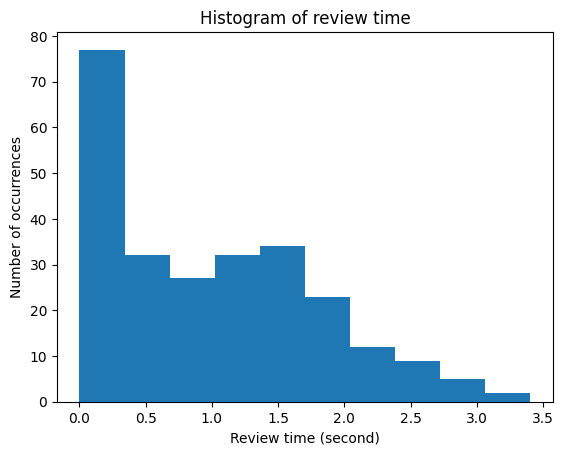

In [5]:
plt.hist(df['review'])
plt.xlabel("Review time (second)")
plt.ylabel("Number of occurrences")
plt.title("Histogram of review time")

plt.show()

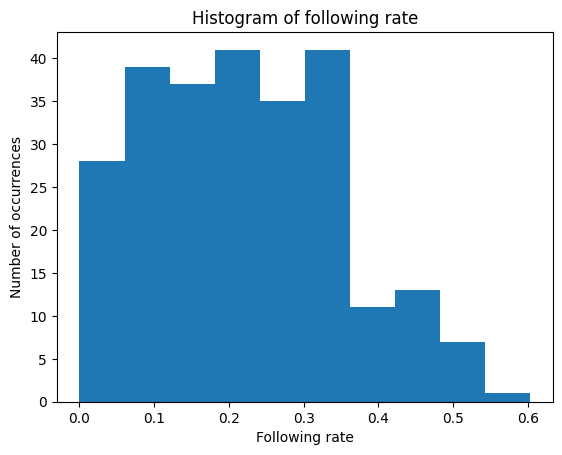

In [6]:
plt.hist(df['following'])
plt.xlabel("Following rate")
plt.ylabel("Number of occurrences")
plt.title("Histogram of following rate")

plt.show()

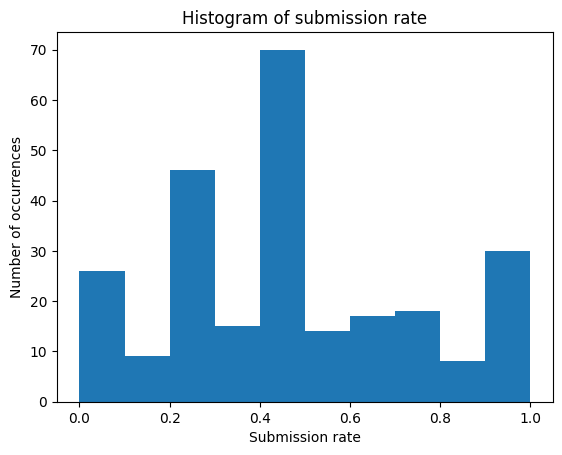

In [7]:
plt.hist(df['Submit'])
plt.xlabel("Submission rate")
plt.ylabel("Number of occurrences")
plt.title("Histogram of submission rate")

plt.show()

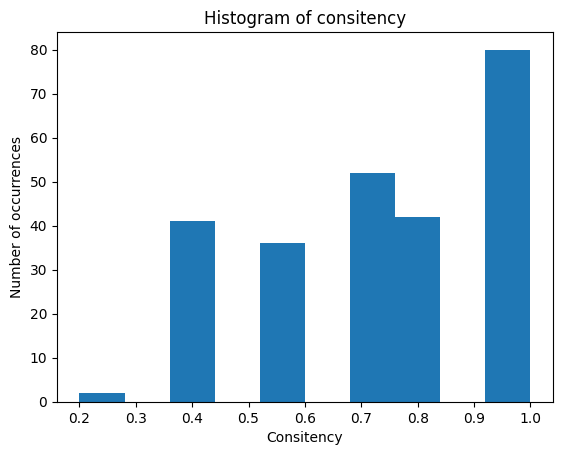

In [8]:
plt.hist(df['consistency'])
plt.xlabel("Consitency")
plt.ylabel("Number of occurrences")
plt.title("Histogram of consitency")

plt.show()

_____________________________________________________________________________________________________________________________________________________________________________________________________________________

MAKE PREPROCESSING PIPELINE

In [9]:
#define categorical and numerical data
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

In [10]:
#simple preprocessing pipeline for liner
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])

In [54]:
#continue building pipeline for tree model
cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
        StandardScaler(),KNNImputer(n_neighbors=13, weights="uniform")
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=13))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])

_____________________________________________________________________________________________________________________________________________________________________________________________________________________

MAKE STACK OF RPEDICTORS:

model in use: NB, SVM, K-NN, RF, LR, Lasso, Gradient Boosting

In [145]:
rf_pipeline = make_pipeline(linear_preprocessor ,RandomForestClassifier(random_state=42))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=13))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [146]:
knn_pipeline = make_pipeline(linear_preprocessor, KNeighborsClassifier(n_neighbors=2))
knn_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=13))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [147]:
nb_pipeline = make_pipeline(linear_preprocessor, GaussianNB())
nb_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=13))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                ('gaussiannb', GaussianNB())])

In [152]:
svm_pipeline = make_pipeline(linear_preprocessor, SVC())
svm_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=13))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                ('svc', SVC())])

In [149]:
lr_pipeline = make_pipeline(linear_preprocessor, LogisticRegression())
lr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=13))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                ('logisticregression', LogisticRegression())])

In [155]:
estimators = [
    ("Random Forest", rf_pipeline),
    ('Logistic Regression',lr_pipeline),
    ('SVM', svm_pipeline),
    ("Naive Bayes", nb_pipeline),
    ('K nearest neighbor', knn_pipeline)
]
    
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True),cv=3)
stacking_classifier

StackingClassifier(cv=3,
                   estimators=[('Random Forest',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline',
                                                                                  Pipeline(steps=[('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('knnimputer',
                                                                                                   KNNImputer(n_neighbors=13))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(hand...
                                                                                                   KNNImputer(n_neighbors=13))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F03CC4C0>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000201F0374640>)])),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=2))]))],
                   final_estimator=SVC(probability=True))

Flashback: In the previous work I tried to split into different course and RF achieve a relative high accuracy rate up to 82%

However, when I try to one-hot encoding the course and fit model again with a pipelien the accuracy rate of RF is low only around 40%.
This lead me to a dilema to decide whether what to do to build an efficient model. 



_____________________________________________________________________________________________________________________________________________________________________________________________________________________

Main work: fitting models

In [132]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [133]:
df

,Unnamed: 0,Student id,s-email,% participate,consistency,c_in_f_half,c_in_s_half,following,immediate_f,review,...,Gender,Matriculation Score,Aspiration,Math Score,Second Score,Third Score,Highschool GPA,Average_y,Submit,Range
0,204,11190958,11190958@st.neu.edu.vn.y2meU,0.142857,0.714286,0.333333,1.0,0.525082,0.250000,0.000000,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,B
1,0,11193747,11193747@st.neu.edu.vn.X0bMT,1.000000,1.000000,1.000000,1.0,0.257812,0.350000,0.108356,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,B
2,1,11193775,11193775@st.neu.edu.vn.X0bMT,0.428571,0.714286,0.333333,1.0,0.196256,0.231293,0.301133,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
3,2,11200006,11200006@st.neu.edu.vn.L71ar,1.000000,1.000000,1.000000,1.0,0.282074,0.209524,0.850032,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,A
4,3,11200012,11200012@st.neu.edu.vn.X0bMT,1.000000,1.000000,1.000000,1.0,0.475391,0.496939,1.549039,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,251,11218494,11218494@st.neu.edu.vn.y2meU,1.000000,1.000000,1.000000,1.0,0.051431,0.052976,0.085158,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,A
249,194,11218495,11218495@st.neu.edu.vn.L71ar,1.000000,1.000000,1.000000,1.0,0.204232,0.365568,1.607492,...,1,27.55,1.0,8.8,8.5,10.0,8.6,NaN,0.200000,A
250,252,11218496,11218496@st.neu.edu.vn.y2meU,0.857143,0.714286,0.333333,1.0,0.318386,0.326190,0.563102,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491667,B
251,195,11219905,11219905@st.neu.edu.vn.L71ar,0.428571,0.428571,0.333333,0.5,0.174880,0.125000,0.000000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,C


In [156]:
#train test split
X= df[['consistency','following','review','Attendance_x',"Middle-term exam",'Compulsory_x',"Average_y","Subject","Matriculation Score","Age","Gender","Highschool GPA",'Submit']]
y= df['Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=45)
stacking_classifier.fit(X_train,y_train)
y_pred= stacking_classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8235294117647058


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Confusion matrix, without normalization
[[ 75   6   0   0]
 [  2 126   2   0]
 [  1  12  26   0]
 [  0   2   1   0]]
Normalized confusion matrix
[[0.92592593 0.07407407 0.         0.        ]
 [0.01538462 0.96923077 0.01538462 0.        ]
 [0.02564103 0.30769231 0.66666667 0.        ]
 [0.         0.66666667 0.33333333 0.        ]]


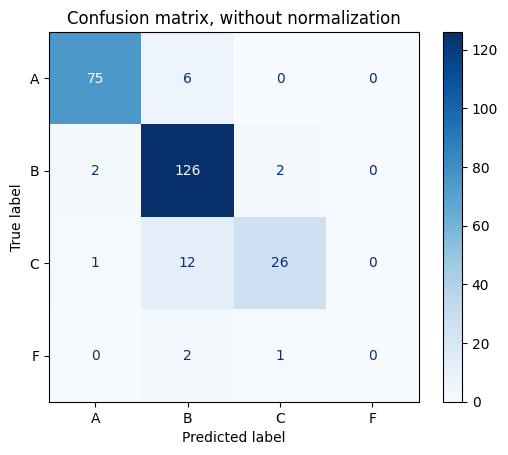

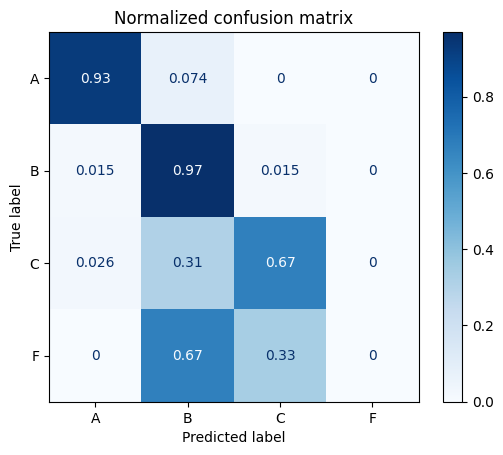

In [63]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        stacking_classifier,
        X,
        y,
        display_labels=["A","B","C","F"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Evaluation for models

157    A
252    C
44     A
237    B
132    B
      ..
32     B
124    A
131    A
158    B
203    B
Name: Range, Length: 202, dtype: object


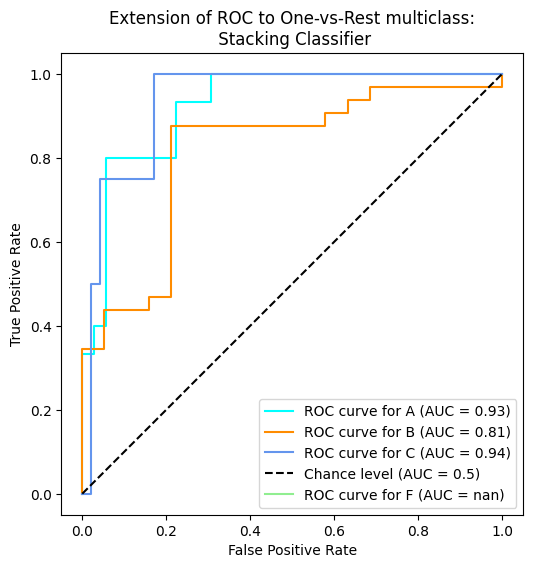

In [157]:
#calculate scores of Stacking Classifier
stacking_classifier.fit(X_train,y_train)
y_pred= stacking_classifier.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
print(y_train)
colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Stacking Classifier")
plt.legend()
plt.show()


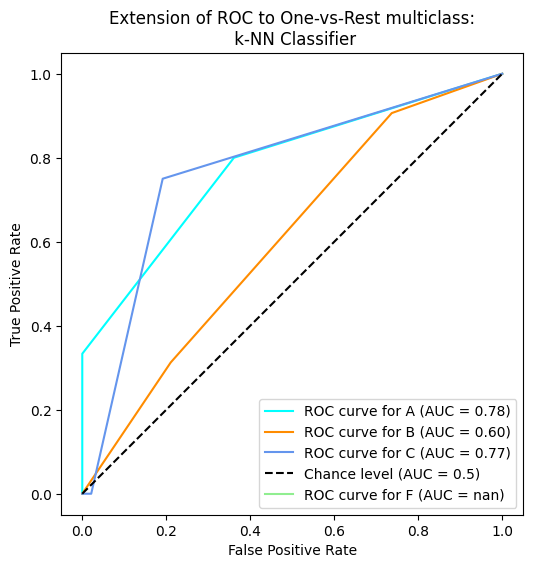

In [135]:
#calculate scores of KNN
knn_pipeline.fit(X_train,y_train)
y_pred= knn_pipeline.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n k-NN Classifier")
plt.legend()
plt.show()

[[0.12908479 0.73475186 0.11109816 0.02506519]
 [0.29349306 0.67127346 0.027283   0.00795047]
 [0.02648573 0.8444292  0.11832788 0.0107572 ]
 [0.15437822 0.72211579 0.10631968 0.01718631]
 [0.01974118 0.69824163 0.2662741  0.01574309]
 [0.04058333 0.85141382 0.09750625 0.0104966 ]
 [0.57153723 0.40800454 0.01471348 0.00574476]
 [0.7589106  0.20412044 0.02601239 0.01095656]
 [0.43087275 0.53619965 0.02304417 0.00988342]
 [0.22374926 0.71347111 0.05076252 0.0120171 ]
 [0.92645774 0.05631295 0.00947949 0.00774983]
 [0.30569174 0.36796456 0.25019263 0.07615107]
 [0.31997865 0.62817242 0.04117573 0.01067321]
 [0.24816524 0.55420727 0.17101779 0.0266097 ]
 [0.08289442 0.45631157 0.32768054 0.13311347]
 [0.57326473 0.38858482 0.02816712 0.00998333]
 [0.32909978 0.64768511 0.01497874 0.00823636]
 [0.30302123 0.64985145 0.03828055 0.00884677]
 [0.49314209 0.48008761 0.01840578 0.00836451]
 [0.1729391  0.19669818 0.57571566 0.05464706]
 [0.21562781 0.69888697 0.06931426 0.01617096]
 [0.21782741 

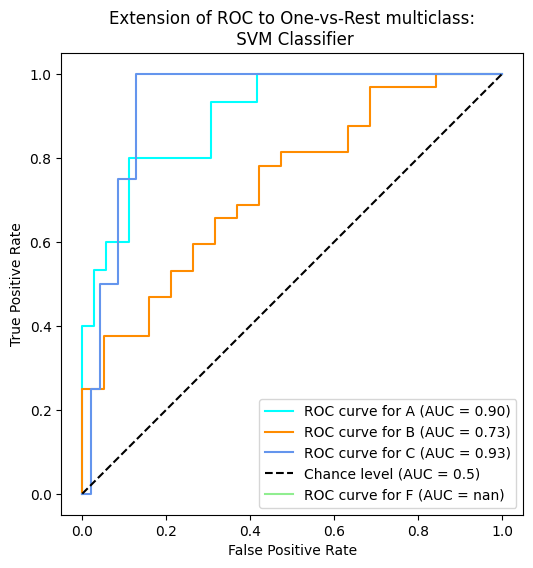

In [136]:
#calculate scores of SVM
svm_pipeline.fit(X_train,y_train)
y_pred= svm_pipeline.predict_proba(X_test)
print(y_pred)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n SVM Classifier")
plt.legend()
plt.show()

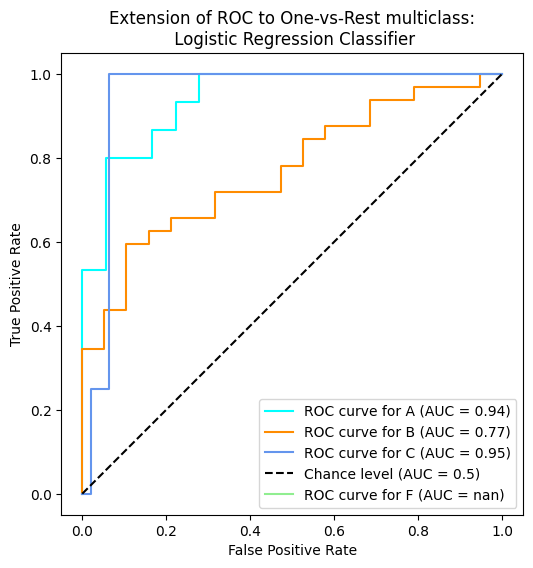

In [141]:
#calculate scores of LR
lr_pipeline.fit(X_train,y_train)
y_pred= lr_pipeline.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Logistic Regression Classifier")
plt.legend()
plt.show()

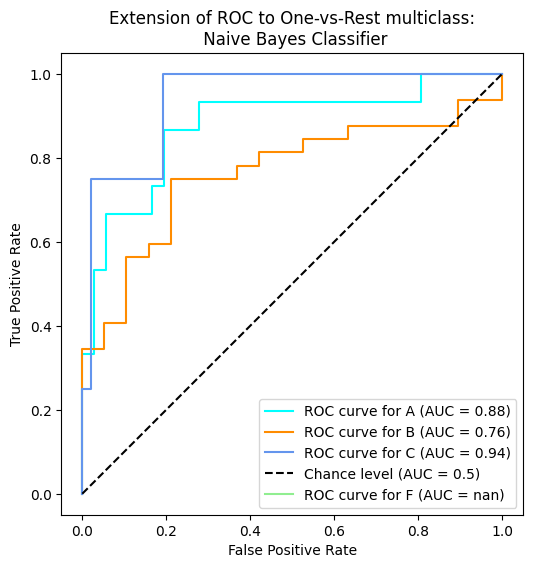

In [140]:
#calculate scores of NB
nb_pipeline.fit(X_train,y_train)
y_pred= nb_pipeline.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Naive Bayes Classifier")
plt.legend()
plt.show()

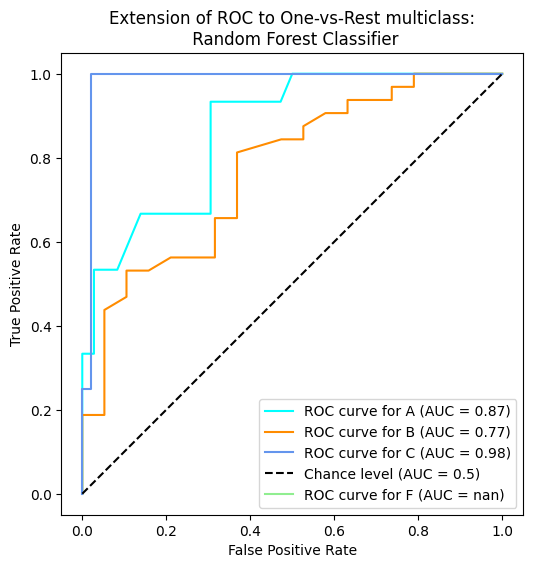

In [139]:
#calculate scores of RF
rf_pipeline.fit(X_train,y_train)
y_pred= rf_pipeline.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Random Forest Classifier")
plt.legend()
plt.show()

[[0.01 0.26 0.7  0.03]
 [0.32 0.6  0.02 0.06]
 [0.01 0.13 0.2  0.66]
 ...
 [0.12 0.85 0.03 0.  ]
 [0.05 0.13 0.81 0.01]
 [0.13 0.17 0.7  0.  ]]
[[0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]]
Micro-averaged One-vs-Rest ROC AUC score:
1.00


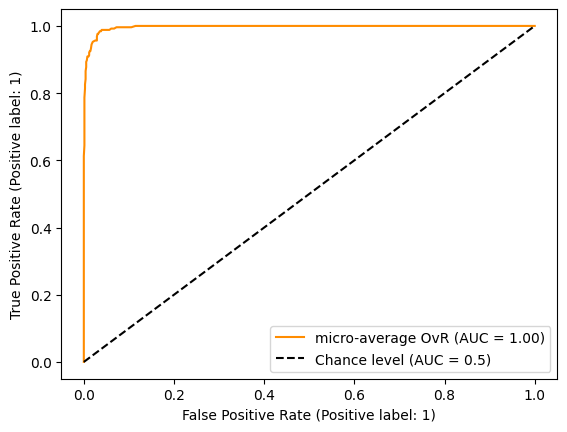

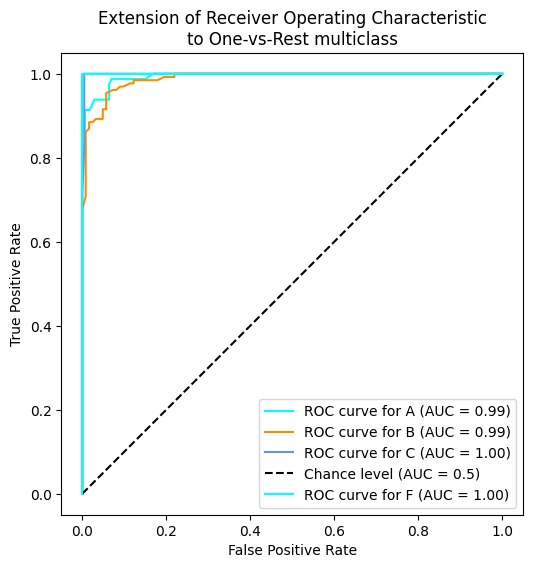

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Macro-averaged One-vs-Rest ROC AUC score:
1.00


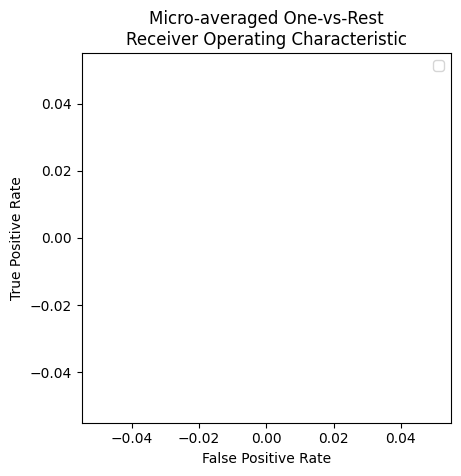

In [83]:
rf_pipeline.fit(X_train,y_train)
y_pred= rf_pipeline.predict_proba(X)
n_classes = len(np.unique(y))
target_names =['A',"B","C","F"]
print(y_pred)
label_binarizer = LabelBinarizer().fit(y)
y_onehot_test = label_binarizer.transform(y)
y_onehot_test.shape 
print(y_onehot_pred)
colors = cycle(["aqua", "darkorange", "cornflowerblue","lightgreen"])
class_of_interest = "B"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
fig, ax = plt.subplots(figsize=(6, 6))


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()
print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()